In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device,True)



In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="0000:68:00.0";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1";  

In [2]:
# print(K.tensorflow_backend._get_available_gpus())
from __future__ import absolute_import, division, print_function, unicode_literals
#
import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device,True)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    


In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import keras.layers as layers
import keras
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.models import Sequential, Input, Model
from keras.layers import (Dense, Conv1D, Convolution2D, GRU, LSTM, Recurrent, Bidirectional, TimeDistributed,
                          Dropout, Flatten, RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from keras.layers.core import Lambda
from keras.optimizers import Adam
from keras.regularizers import l1,l2
from keras.models import load_model
from sklearn import preprocessing
from keras.models import load_model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import linear_model
import pandas as pd
import torch
import torch.nn as nn
import random
#from keras import layers as layers
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy import special
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import tensorflow as tf
import tensorflow.keras.backend as K
from keras.callbacks import ModelCheckpoint
from sklearn.decomposition import NMF
from scipy import io
import numpy as np
import os
import os.path

# # loads the custom graphing format
# viz.format.custom_plt_format()

# plt.style.use('seaborn-white')

Using TensorFlow backend.


In [4]:
import os
if os.path.exists("./Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks"):
    pass
else:
    !git clone https://github.com/jagar2/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks.git

In [5]:
cd Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks

/home/shuyu/497_MAT_Assignment/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks


In [19]:
cd 497_MAT_Assignment/

[Errno 2] No such file or directory: '497_MAT_Assignment/'
/home/shuyu/497_MAT_Assignment/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks


In [27]:
!pip install -U moviepy keras tensorflow natsort tqdm scikit_image scikit_learn scipy
!pip install pillow==6.1
!pip install -U imageio

Requirement already up-to-date: moviepy in /home/shuyu/anaconda3/lib/python3.7/site-packages (1.0.1)
Requirement already up-to-date: keras in /home/shuyu/anaconda3/lib/python3.7/site-packages (2.3.1)
Requirement already up-to-date: tensorflow in /home/shuyu/anaconda3/lib/python3.7/site-packages (2.1.0)
Requirement already up-to-date: natsort in /home/shuyu/anaconda3/lib/python3.7/site-packages (7.0.1)
Requirement already up-to-date: tqdm in /home/shuyu/anaconda3/lib/python3.7/site-packages (4.42.1)
Requirement already up-to-date: scikit_image in /home/shuyu/anaconda3/lib/python3.7/site-packages (0.16.2)
Requirement already up-to-date: scikit_learn in /home/shuyu/anaconda3/lib/python3.7/site-packages (0.22.1)
Requirement already up-to-date: scipy in /home/shuyu/anaconda3/lib/python3.7/site-packages (1.4.1)
  Using cached https://files.pythonhosted.org/packages/18/90/b77c328a1304437ab1310b463e533fa7689f4bfc41549593056d812fab8e/tensorflow_estimator-2.1.0-py2.py3-none-any.whl
  Using cache

ERROR: tensorflow-gpu 2.0.0 has requirement tensorboard<2.1.0,>=2.0.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow-gpu 2.0.0 has requirement tensorflow-estimator<2.1.0,>=2.0.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.0.0
    Uninstalling tensorflow-estimator-2.0.0:
      Successfully uninstalled tensorflow-estimator-2.0.0
  Found existing installation: tensorboard 2.0.0
    Uninstalling tensorboard-2.0.0:
      Successfully uninstalled tensorboard-2.0.0
Requirement already up-to-date: imageio in /home/shuyu/anaconda3/lib/python3.7/site-packages (2.6.1)


In [6]:
import warnings
warnings.filterwarnings('ignore')
import imp
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import codes.analysis.rnn as rnn
import codes.util as util
import codes.analysis.machine_learning as ml
import codes.analysis as an
import codes.processing as p
import codes.viz as viz
import codes.util.input_output as io_transfer



In [7]:
imported = {'data': io.matlab.loadmat('./Raw_Data/Data.mat'),
            'validation_data': io.matlab.loadmat('Raw_Data/loop_1.mat')}

# extracts the important information from the raw data
raw = {'voltage': imported['data']['Voltagedata_mixed'],
       'piezoresponse': imported['data']['Loopdata_mixed'],
       'amplitude': imported['data']['OutA2_mixed'],
       'phase': imported['data']['OutPhi1_mixed'],
       'resonance': imported['data']['Outw2_mixed'],
       'quality_factor': imported['data']['OutQ2_mixed'],
       'val_piezoresponse': imported['validation_data']['piezo_1'],
       'val_resonance': imported['validation_data']['resonance_loop_1']}

In [8]:
raw['piezoresponse'].shape

(60, 60, 96)

In [9]:
p.filters.range_filter(raw['resonance'], [1300, 1340])
p.filters.range_filter(raw['val_resonance'], [1300, 1340])

# interpolates data that is non-real. This happens when the SHO fit fails
interpolated = {'voltage': raw['voltage'],
                'piezoresponse': p.filters.clean_interpolate(raw['piezoresponse'],
                                                             'linear').reshape(-1, raw['piezoresponse'].shape[2]),
                'amplitude': p.filters.clean_interpolate(raw['amplitude'],
                                                         'linear').reshape(-1, raw['amplitude'].shape[2]),
                'phase': p.filters.clean_interpolate(raw['phase'],
                                                     'linear').reshape(-1, raw['phase'].shape[2]),
                'resonance': p.filters.clean_interpolate(raw['resonance'],
                                                         'linear').reshape(-1, raw['resonance'].shape[2]),
                'quality_factor': p.filters.clean_interpolate(raw['quality_factor'],
                                                              'linear').reshape(-1, raw['quality_factor'].shape[2]),
                'val_piezoresponse': p.filters.clean_interpolate(raw['val_piezoresponse'],
                                                                  'linear').reshape(-1, raw['val_piezoresponse'].shape[2]),
                'val_resonance': p.filters.clean_interpolate(raw['val_resonance'],
                                                             'linear').reshape(-1, raw['val_resonance'].shape[2])}
# Uses Savitzky-Golay filter to remove outlier points
sg_filtered = {'voltage': raw['voltage'],
               'piezoresponse': p.filters.savgol(interpolated['piezoresponse'], fit_type='linear'),
               'amplitude': p.filters.savgol(interpolated['amplitude'], fit_type='linear'),
               'phase': p.filters.savgol(interpolated['phase'], fit_type='linear'),
               'resonance': p.filters.savgol(interpolated['resonance'], fit_type='linear'),
               'quality_factor': p.filters.savgol(interpolated['quality_factor'], fit_type='linear'),
               'val_piezoresponse': p.filters.savgol(interpolated['val_piezoresponse'], fit_type='linear'),
               'val_resonance': p.filters.savgol(interpolated['val_resonance'], fit_type='linear')}

# normalized the data. This is important for training Neural Networks
normalized = {'voltage': raw['voltage'],
              'piezoresponse': p.filters.normalize(sg_filtered['piezoresponse']),
              'amplitude': p.filters.normalize(sg_filtered['amplitude']),
              'phase': p.filters.normalize(sg_filtered['phase']),
              'resonance': p.filters.normalize(sg_filtered['resonance']),
              'quality_factor': p.filters.normalize(sg_filtered['quality_factor']),
              'val_piezoresponse': p.filters.normalize(sg_filtered['val_piezoresponse'],
                                                       sg_filtered['piezoresponse']),
              'val_resonance': p.filters.normalize(sg_filtered['val_resonance'],
                                                   sg_filtered['resonance'])}

In [10]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
scipy: 1.4.1
numpy: 1.17.2
matplotlib: 2.2.3
pandas: 0.25.1
sklearn: 0.22.1


In [11]:
normalized['piezoresponse'].shape

(3600, 96)

In [12]:
def encode_identity_block(X, stage, block, size, n_step, drop_frac, l1_norm):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'enconde' + str(stage) + block + '_branch'

    X_shortcut = X
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)), input_shape=(n_step, 1))(X)

    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)), input_shape=(n_step, 1))(X)

    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)), input_shape=(n_step, 1))(X)

    

    X = layers.add([X, X_shortcut])
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)
    X = layers.Activation('relu')(X)

    return X


def decode_identity_block(X, stage, block, size, n_step, drop_frac, l1_norm):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'decode' + str(stage) + block + '_branch'

    X_shortcut = X
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)))(X)
    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)))(X)

    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)))(X)
    # 

    X = layers.add([X, X_shortcut])
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)
    X = layers.Activation('relu')(X)

    return X


def ResNet50(lr=3e-5, size=128, drop_frac=0, n_step=96, embedding=16, l1_norm=1e-5):
    X_input = layers.Input(shape=(n_step, 1))
    X = X_input

    X = encode_identity_block(X, 2, 'b', size, n_step, drop_frac, l1_norm)
    X = encode_identity_block(X, 2, 'c', size, n_step, drop_frac, l1_norm)
    X = encode_identity_block(X, 2, 'd', size, n_step, drop_frac, l1_norm)

    X = layers.Bidirectional(LSTM(size, return_sequences=False, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)), input_shape=(n_step, 1))(X)
    #X = layers.BatchNormalization(axis=1, name='last_encode')(X)
    X = layers.Activation('relu')(X)
    X = layers.Dense(embedding, activation='relu', name='embedding_layer', activity_regularizer=l1(l1_norm))(X)
    X = layers.RepeatVector(n_step)(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)))(X)

    # X = layers.BatchNormalization(axis = 1, name = 'fires_decode')(X)
    X = layers.Activation('relu')(X)

    X = decode_identity_block(X, 2, 'b', size, n_step, drop_frac, l1_norm)
    X = decode_identity_block(X, 2, 'c', size, n_step, drop_frac, l1_norm)
    X = decode_identity_block(X, 2, 'd', size, n_step, drop_frac, l1_norm)

    X = layers.BatchNormalization(axis=1, name='batch_normal')(X)
    X = layers.TimeDistributed(Dense(1, activation='linear'))(X)
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    model.compile(Adam(lr), loss='mse')

    return model

In [13]:
X = np.atleast_3d(normalized['piezoresponse'])
Y = np.atleast_3d(normalized['val_piezoresponse'])

In [63]:
X.shape

(3600, 96, 1)

In [12]:
auto = ResNet50()
checkpointer = ModelCheckpoint("resnet_jagar_data_16", monitor='loss', verbose=0, save_best_only=True)

In [13]:
model1 = auto.fit(x = X,y = Y,epochs=5000,batch_size=256,steps_per_epoch = None,callbacks=[checkpointer])

Epoch 1/5000
3600/3600 [==============================] - 92s 26ms/step - loss: 40.2837
Epoch 2/5000
3600/3600 [==============================] - 74s 21ms/step - loss: 26.6551
Epoch 3/5000
3600/3600 [==============================] - 71s 20ms/step - loss: 20.6110
Epoch 4/5000
3600/3600 [==============================] - 74s 21ms/step - loss: 16.2605
Epoch 5/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 12.9607
Epoch 6/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 10.3672
Epoch 7/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 8.4012
Epoch 8/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 6.8989
Epoch 9/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 5.7199
Epoch 10/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 4.8099
Epoch 11/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 4.1110
Epoch 12/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 22ms/step - loss: 1.0097
Epoch 95/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.9908
Epoch 96/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.9789
Epoch 97/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.9745
Epoch 98/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.9579
Epoch 99/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.9480
Epoch 100/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.9385
Epoch 101/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.9484
Epoch 102/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.9358
Epoch 103/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.9211
Epoch 104/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.9129
Epoch 105/5000
3600/3600 [===============

3600/3600 [==============================] - 81s 23ms/step - loss: 0.1880
Epoch 279/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1840
Epoch 280/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.1813
Epoch 281/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1770
Epoch 282/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1741
Epoch 283/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1719
Epoch 284/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1690
Epoch 285/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1682
Epoch 286/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1650
Epoch 287/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1629
Epoch 288/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.1599
Epoch 289/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0980
Epoch 463/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0974
Epoch 464/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0972
Epoch 465/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0973
Epoch 466/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0974
Epoch 467/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0970
Epoch 468/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0980
Epoch 469/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0966
Epoch 470/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0962
Epoch 471/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0963
Epoch 472/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0960
Epoch 473/5000
3600/3600 [==========

3600/3600 [==============================] - 74s 21ms/step - loss: 0.0718
Epoch 647/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0873
Epoch 648/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0794
Epoch 649/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0729
Epoch 650/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0742
Epoch 651/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0764
Epoch 652/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0728
Epoch 653/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0767
Epoch 654/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0726
Epoch 655/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0751
Epoch 656/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0704
Epoch 657/5000
3600/3600 [==========

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0596
Epoch 831/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0699
Epoch 832/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0650
Epoch 833/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0609
Epoch 834/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0603
Epoch 835/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0616
Epoch 836/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0597
Epoch 837/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0589
Epoch 838/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0592
Epoch 839/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0633
Epoch 840/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0612
Epoch 841/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0438
Epoch 1015/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0456
Epoch 1016/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0427
Epoch 1017/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0424
Epoch 1018/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0442
Epoch 1019/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0481
Epoch 1020/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0519
Epoch 1021/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0456
Epoch 1022/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0439
Epoch 1023/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0441
Epoch 1024/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0417
Epoch 1025/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0396
Epoch 1197/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0376
Epoch 1198/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0394
Epoch 1199/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0396
Epoch 1200/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0382
Epoch 1201/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0447
Epoch 1202/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0438
Epoch 1203/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0413
Epoch 1204/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0380
Epoch 1205/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0408
Epoch 1206/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0385
Epoch 1207/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0466
Epoch 1379/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0382
Epoch 1380/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0380
Epoch 1381/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0416
Epoch 1382/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0383
Epoch 1383/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0347
Epoch 1384/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0345
Epoch 1385/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0357
Epoch 1386/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0344
Epoch 1387/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0340
Epoch 1388/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0359
Epoch 1389/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0324
Epoch 1561/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0325
Epoch 1562/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0341
Epoch 1563/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0319
Epoch 1564/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0323
Epoch 1565/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0350
Epoch 1566/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0345
Epoch 1567/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0323
Epoch 1568/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0329
Epoch 1569/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0349
Epoch 1570/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0322
Epoch 1571/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0334
Epoch 1743/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0313
Epoch 1744/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0296
Epoch 1745/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0304
Epoch 1746/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0316
Epoch 1747/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0300
Epoch 1748/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0309
Epoch 1749/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0306
Epoch 1750/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0302
Epoch 1751/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0297
Epoch 1752/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0286
Epoch 1753/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0281
Epoch 1925/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0276
Epoch 1926/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0272
Epoch 1927/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0283
Epoch 1928/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0296
Epoch 1929/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0359
Epoch 1930/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0300
Epoch 1931/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0303
Epoch 1932/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0276
Epoch 1933/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0282
Epoch 1934/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0290
Epoch 1935/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0266
Epoch 2107/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0285
Epoch 2108/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0270
Epoch 2109/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0269
Epoch 2110/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0297
Epoch 2111/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0281
Epoch 2112/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0265
Epoch 2113/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0280
Epoch 2114/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0290
Epoch 2115/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0272
Epoch 2116/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0296
Epoch 2117/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0266
Epoch 2289/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0269
Epoch 2290/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0256
Epoch 2291/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0262
Epoch 2292/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0280
Epoch 2293/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0269
Epoch 2294/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0255
Epoch 2295/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0249
Epoch 2296/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0255
Epoch 2297/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0252
Epoch 2298/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0292
Epoch 2299/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0246
Epoch 2471/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0342
Epoch 2472/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0305
Epoch 2473/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0260
Epoch 2474/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0268
Epoch 2475/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0263
Epoch 2476/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0242
Epoch 2477/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0238
Epoch 2478/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0243
Epoch 2479/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0237
Epoch 2480/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0242
Epoch 2481/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0248
Epoch 2653/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0241
Epoch 2654/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0256
Epoch 2655/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0251
Epoch 2656/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0239
Epoch 2657/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0243
Epoch 2658/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0243
Epoch 2659/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0246
Epoch 2660/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0243
Epoch 2661/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0240
Epoch 2662/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0242
Epoch 2663/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0232
Epoch 2835/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0226
Epoch 2836/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0235
Epoch 2837/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0240
Epoch 2838/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0279
Epoch 2839/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0272
Epoch 2840/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0275
Epoch 2841/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0242
Epoch 2842/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0238
Epoch 2843/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0224
Epoch 2844/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0237
Epoch 2845/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0233
Epoch 3017/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0225
Epoch 3018/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0218
Epoch 3019/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0236
Epoch 3020/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0243
Epoch 3021/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0235
Epoch 3022/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0225
Epoch 3023/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0217
Epoch 3024/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0222
Epoch 3025/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0710
Epoch 3026/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0691
Epoch 3027/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0215
Epoch 3199/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0209
Epoch 3200/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0214
Epoch 3201/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0220
Epoch 3202/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0252
Epoch 3203/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0227
Epoch 3204/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0220
Epoch 3205/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0228
Epoch 3206/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0219
Epoch 3207/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0270
Epoch 3208/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0242
Epoch 3209/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0210
Epoch 3381/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0212
Epoch 3382/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0209
Epoch 3383/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0209
Epoch 3384/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0219
Epoch 3385/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0212
Epoch 3386/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0209
Epoch 3387/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0219
Epoch 3388/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0204
Epoch 3389/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0242
Epoch 3390/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0253
Epoch 3391/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0219
Epoch 3563/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0226
Epoch 3564/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0226
Epoch 3565/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0212
Epoch 3566/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0206
Epoch 3567/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0207
Epoch 3568/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0204
Epoch 3569/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0226
Epoch 3570/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0206
Epoch 3571/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0197
Epoch 3572/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0233
Epoch 3573/5000
3600/3600 

3600/3600 [==============================] - 69s 19ms/step - loss: 0.0219
Epoch 3745/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0210
Epoch 3746/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0209
Epoch 3747/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0205
Epoch 3748/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0205
Epoch 3749/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0202
Epoch 3750/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0207
Epoch 3751/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0213
Epoch 3752/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0201
Epoch 3753/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0259
Epoch 3754/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0226
Epoch 3755/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0202
Epoch 3927/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0193
Epoch 3928/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0192
Epoch 3929/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0228
Epoch 3930/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0203
Epoch 3931/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0201
Epoch 3932/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0192
Epoch 3933/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0202
Epoch 3934/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0201
Epoch 3935/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0295
Epoch 3936/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0261
Epoch 3937/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0199
Epoch 4109/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0206
Epoch 4110/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0199
Epoch 4111/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0201
Epoch 4112/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0198
Epoch 4113/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0197
Epoch 4114/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0196
Epoch 4115/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0189
Epoch 4116/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0198
Epoch 4117/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0202
Epoch 4118/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0197
Epoch 4119/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0207
Epoch 4291/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0207
Epoch 4292/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0200
Epoch 4293/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0194
Epoch 4294/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0201
Epoch 4295/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0190
Epoch 4296/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0192
Epoch 4297/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0192
Epoch 4298/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0188
Epoch 4299/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0188
Epoch 4300/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0197
Epoch 4301/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0224
Epoch 4473/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0204
Epoch 4474/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0190
Epoch 4475/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0182
Epoch 4476/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0184
Epoch 4477/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0194
Epoch 4478/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0187
Epoch 4479/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0185
Epoch 4480/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0204
Epoch 4481/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0192
Epoch 4482/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0184
Epoch 4483/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0207
Epoch 4655/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0189
Epoch 4656/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0190
Epoch 4657/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0207
Epoch 4658/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0194
Epoch 4659/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0190
Epoch 4660/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0185
Epoch 4661/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0186
Epoch 4662/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0183
Epoch 4663/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0188
Epoch 4664/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0183
Epoch 4665/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0201
Epoch 4837/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0195
Epoch 4838/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0190
Epoch 4839/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0216
Epoch 4840/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0200
Epoch 4841/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0195
Epoch 4842/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0193
Epoch 4843/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0198
Epoch 4844/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0225
Epoch 4845/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0199
Epoch 4846/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0213
Epoch 4847/5000
3600/3600 

In [14]:
result = auto.predict(X)

In [56]:
X_again = result

In [58]:
auto_continue = ResNet50()
checkpointer = ModelCheckpoint("resnet_jagar_data_16_countinue", monitor='loss', verbose=0, save_best_only=True)

In [59]:
model2 = auto_continue.fit(x = X_again,y = Y,epochs=5000,batch_size=256,steps_per_epoch = None,callbacks=[checkpointer])

Epoch 1/5000
3600/3600 [==============================] - 90s 25ms/step - loss: 52.6314
Epoch 2/5000
3600/3600 [==============================] - 77s 21ms/step - loss: 34.7674
Epoch 3/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 23.6724
Epoch 4/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 18.9282
Epoch 5/5000
3600/3600 [==============================] - 77s 22ms/step - loss: 17.4744
Epoch 6/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 14.9111
Epoch 7/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 13.0391
Epoch 8/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 12.2739
Epoch 9/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 11.0796
Epoch 10/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 9.8018
Epoch 11/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 9.1617
Epoch 12/5000
3600/3600 [=======

3600/3600 [==============================] - 81s 22ms/step - loss: 2.7054
Epoch 95/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 2.6771
Epoch 96/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 2.6577
Epoch 97/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 2.6362
Epoch 98/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 2.6206
Epoch 99/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 2.6034
Epoch 100/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 2.5821
Epoch 101/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 2.5661
Epoch 102/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 2.5421
Epoch 103/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 2.5284
Epoch 104/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 2.5161
Epoch 105/5000
3600/3600 [===============

3600/3600 [==============================] - 81s 22ms/step - loss: 1.1374
Epoch 279/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 1.1435
Epoch 280/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 1.7523
Epoch 281/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 1.5796
Epoch 282/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 1.5366
Epoch 283/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 1.4793
Epoch 284/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 1.4289
Epoch 285/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 1.3844
Epoch 286/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 1.3526
Epoch 287/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 1.3251
Epoch 288/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 1.2909
Epoch 289/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 23ms/step - loss: 0.5140
Epoch 463/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.5059
Epoch 464/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.4946
Epoch 465/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.4875
Epoch 466/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.5624
Epoch 467/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.6206
Epoch 468/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.5975
Epoch 469/5000
3600/3600 [==============================] - 72s 20ms/step - loss: 0.5741
Epoch 470/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.5553
Epoch 471/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.5438
Epoch 472/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.5272
Epoch 473/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 23ms/step - loss: 0.4860
Epoch 647/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.4819
Epoch 648/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.4767
Epoch 649/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.4722
Epoch 650/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.4686
Epoch 651/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.4643
Epoch 652/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.4609
Epoch 653/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.4581
Epoch 654/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.4558
Epoch 655/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.4535
Epoch 656/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.7435
Epoch 657/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 23ms/step - loss: 0.3244
Epoch 831/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.3126
Epoch 832/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.3033
Epoch 833/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.2974
Epoch 834/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.2919
Epoch 835/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.2878
Epoch 836/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.2814
Epoch 837/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.2784
Epoch 838/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.2747
Epoch 839/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.2733
Epoch 840/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.2704
Epoch 841/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.2351
Epoch 1015/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.2280
Epoch 1016/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.2216
Epoch 1017/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.2254
Epoch 1018/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.2230
Epoch 1019/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.2305
Epoch 1020/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.2242
Epoch 1021/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.2204
Epoch 1022/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.2203
Epoch 1023/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.2161
Epoch 1024/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.2149
Epoch 1025/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.1403
Epoch 1197/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1536
Epoch 1198/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1494
Epoch 1199/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1438
Epoch 1200/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.1446
Epoch 1201/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1397
Epoch 1202/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1364
Epoch 1203/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1761
Epoch 1204/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.1621
Epoch 1205/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1493
Epoch 1206/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1422
Epoch 1207/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.1390
Epoch 1379/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1389
Epoch 1380/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1396
Epoch 1381/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1381
Epoch 1382/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1382
Epoch 1383/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1376
Epoch 1384/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1380
Epoch 1385/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1388
Epoch 1386/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1382
Epoch 1387/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.1382
Epoch 1388/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1376
Epoch 1389/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.1159
Epoch 1561/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.1158
Epoch 1562/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1152
Epoch 1563/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1150
Epoch 1564/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1154
Epoch 1565/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.1155
Epoch 1566/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1158
Epoch 1567/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1152
Epoch 1568/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1161
Epoch 1569/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1156
Epoch 1570/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1158
Epoch 1571/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.1080
Epoch 1743/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1087
Epoch 1744/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.1108
Epoch 1745/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1102
Epoch 1746/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1083
Epoch 1747/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1082
Epoch 1748/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1080
Epoch 1749/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1094
Epoch 1750/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1079
Epoch 1751/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1080
Epoch 1752/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1082
Epoch 1753/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.1017
Epoch 1925/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1016
Epoch 1926/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1031
Epoch 1927/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1019
Epoch 1928/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1020
Epoch 1929/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1014
Epoch 1930/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1019
Epoch 1931/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1025
Epoch 1932/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1027
Epoch 1933/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1055
Epoch 1934/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.1021
Epoch 1935/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0991
Epoch 2107/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0980
Epoch 2108/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.1005
Epoch 2109/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0995
Epoch 2110/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0984
Epoch 2111/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.1024
Epoch 2112/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0992
Epoch 2113/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0984
Epoch 2114/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0982
Epoch 2115/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0978
Epoch 2116/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0979
Epoch 2117/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0962
Epoch 2289/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0953
Epoch 2290/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0985
Epoch 2291/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0955
Epoch 2292/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0957
Epoch 2293/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0970
Epoch 2294/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0974
Epoch 2295/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0968
Epoch 2296/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0952
Epoch 2297/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0957
Epoch 2298/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0955
Epoch 2299/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0943
Epoch 2471/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0937
Epoch 2472/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0940
Epoch 2473/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0934
Epoch 2474/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0930
Epoch 2475/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0933
Epoch 2476/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0937
Epoch 2477/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0938
Epoch 2478/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0943
Epoch 2479/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0932
Epoch 2480/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0929
Epoch 2481/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0926
Epoch 2653/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0920
Epoch 2654/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0916
Epoch 2655/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0926
Epoch 2656/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0930
Epoch 2657/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0924
Epoch 2658/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0924
Epoch 2659/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0915
Epoch 2660/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0939
Epoch 2661/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0920
Epoch 2662/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0933
Epoch 2663/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0989
Epoch 2835/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0985
Epoch 2836/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0985
Epoch 2837/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0998
Epoch 2838/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0984
Epoch 2839/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0977
Epoch 2840/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0994
Epoch 2841/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0981
Epoch 2842/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0973
Epoch 2843/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0989
Epoch 2844/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0975
Epoch 2845/5000
3600/3600 

3600/3600 [==============================] - 71s 20ms/step - loss: 0.0941
Epoch 3017/5000
3600/3600 [==============================] - 70s 20ms/step - loss: 0.0963
Epoch 3018/5000
3600/3600 [==============================] - 74s 21ms/step - loss: 0.1007
Epoch 3019/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0968
Epoch 3020/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0932
Epoch 3021/5000
3600/3600 [==============================] - 74s 21ms/step - loss: 0.0942
Epoch 3022/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0917
Epoch 3023/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0911
Epoch 3024/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0932
Epoch 3025/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0925
Epoch 3026/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0960
Epoch 3027/5000
3600/3600 

KeyboardInterrupt: 

In [97]:
loaded_model  = load_model('resnet_jagar_data_16_with_weights_1')

In [80]:
mmm=loaded_model.load_weights

In [81]:
mmmt = np.asarray(mmm)

In [84]:
mmm

<bound method Network.load_weights of <keras.engine.training.Model object at 0x7ff523f0c210>>

In [90]:
auto_has_weight = ResNet50()
auto_has_weight.set_weights(loaded_model.get_weights())
checkpointer = ModelCheckpoint("resnet_jagar_data_16_with_weights", monitor='loss', verbose=0, save_best_only=True)

In [91]:
model3 = auto_has_weight.fit(x= X, y = Y,epochs=5000,batch_size=256,steps_per_epoch = None,callbacks=[checkpointer])

Epoch 1/5000
3600/3600 [==============================] - 86s 24ms/step - loss: 0.1165
Epoch 2/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0765
Epoch 3/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0536
Epoch 4/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0397
Epoch 5/5000
3600/3600 [==============================] - 77s 21ms/step - loss: 0.0334
Epoch 6/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0310
Epoch 7/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0271
Epoch 8/5000
3600/3600 [==============================] - 77s 21ms/step - loss: 0.0248
Epoch 9/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0237
Epoch 10/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0224
Epoch 11/5000
3600/3600 [==============================] - 67s 19ms/step - loss: 0.0217
Epoch 12/5000
3600/3600 [================

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0187
Epoch 187/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0184
Epoch 188/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0187
Epoch 189/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0193
Epoch 190/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0184
Epoch 191/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0201
Epoch 192/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0194
Epoch 193/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0191
Epoch 194/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0193
Epoch 195/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0181
Epoch 196/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0223
Epoch 197/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0199
Epoch 371/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0184
Epoch 372/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0177
Epoch 373/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0184
Epoch 374/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0179
Epoch 375/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0189
Epoch 376/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0176
Epoch 377/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0180
Epoch 378/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0186
Epoch 379/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0248
Epoch 380/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0220
Epoch 381/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0179
Epoch 555/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0176
Epoch 556/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0200
Epoch 557/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0179
Epoch 558/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0185
Epoch 559/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0183
Epoch 560/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0180
Epoch 561/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0177
Epoch 562/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0200
Epoch 563/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0191
Epoch 564/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0191
Epoch 565/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0184
Epoch 739/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0195
Epoch 740/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0185
Epoch 741/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0174
Epoch 742/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0175
Epoch 743/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0175
Epoch 744/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0185
Epoch 745/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0187
Epoch 746/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0178
Epoch 747/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0176
Epoch 748/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0185
Epoch 749/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0188
Epoch 923/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0180
Epoch 924/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0191
Epoch 925/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0182
Epoch 926/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0175
Epoch 927/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0179
Epoch 928/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0200
Epoch 929/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0180
Epoch 930/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0179
Epoch 931/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0178
Epoch 932/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0170
Epoch 933/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0167
Epoch 1015/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0184
Epoch 1016/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0184
Epoch 1017/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0176
Epoch 1018/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0171
Epoch 1019/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0175
Epoch 1020/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0180
Epoch 1021/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0168
Epoch 1022/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0172
Epoch 1023/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0185
Epoch 1024/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0174
Epoch 1025/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0179
Epoch 1197/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0184
Epoch 1198/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0170
Epoch 1199/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0170
Epoch 1200/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0186
Epoch 1201/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0180
Epoch 1202/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0172
Epoch 1203/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0170
Epoch 1204/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0168
Epoch 1205/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0192
Epoch 1206/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0199
Epoch 1207/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0200
Epoch 1379/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0187
Epoch 1380/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0183
Epoch 1381/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0172
Epoch 1382/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0172
Epoch 1383/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0169
Epoch 1384/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0168
Epoch 1385/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0180
Epoch 1386/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0169
Epoch 1387/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0179
Epoch 1388/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0188
Epoch 1389/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0169
Epoch 1561/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0220
Epoch 1562/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0188
Epoch 1563/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0174
Epoch 1564/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0168
Epoch 1565/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0173
Epoch 1566/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0182
Epoch 1567/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0169
Epoch 1568/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0175
Epoch 1569/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0171
Epoch 1570/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0179
Epoch 1571/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0169
Epoch 1743/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0172
Epoch 1744/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0167
Epoch 1745/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0167
Epoch 1746/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0174
Epoch 1747/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0164
Epoch 1748/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0165
Epoch 1749/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0166
Epoch 1750/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0177
Epoch 1751/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0171
Epoch 1752/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0174
Epoch 1753/5000
3600/3600 

3600/3600 [==============================] - 79s 22ms/step - loss: 0.0160
Epoch 1925/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0163
Epoch 1926/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0179
Epoch 1927/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0178
Epoch 1928/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0171
Epoch 1929/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0166
Epoch 1930/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0165
Epoch 1931/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0168
Epoch 1932/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0160
Epoch 1933/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0159
Epoch 1934/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0179
Epoch 1935/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0164
Epoch 2107/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0159
Epoch 2108/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0160
Epoch 2109/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0164
Epoch 2110/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0178
Epoch 2111/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0164
Epoch 2112/5000
3600/3600 [==============================] - 77s 21ms/step - loss: 0.0166
Epoch 2113/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0161
Epoch 2114/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0188
Epoch 2115/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0172
Epoch 2116/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0168
Epoch 2117/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0158
Epoch 2289/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0168
Epoch 2290/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0162
Epoch 2291/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0159
Epoch 2292/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0166
Epoch 2293/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0160
Epoch 2294/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0167
Epoch 2295/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0174
Epoch 2296/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0168
Epoch 2297/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0163
Epoch 2298/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0164
Epoch 2299/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0159
Epoch 2471/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0166
Epoch 2472/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0161
Epoch 2473/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0168
Epoch 2474/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0181
Epoch 2475/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0165
Epoch 2476/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0159
Epoch 2477/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0168
Epoch 2478/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0161
Epoch 2479/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0172
Epoch 2480/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0169
Epoch 2481/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0166
Epoch 2653/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0158
Epoch 2654/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0155
Epoch 2655/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0159
Epoch 2656/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0150
Epoch 2657/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0151
Epoch 2658/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0162
Epoch 2659/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0180
Epoch 2660/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0162
Epoch 2661/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0156
Epoch 2662/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0156
Epoch 2663/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0161
Epoch 2835/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0164
Epoch 2836/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0159
Epoch 2837/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0162
Epoch 2838/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0165
Epoch 2839/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0186
Epoch 2840/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0165
Epoch 2841/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0161
Epoch 2842/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0160
Epoch 2843/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0156
Epoch 2844/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0184
Epoch 2845/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0152
Epoch 3017/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0153
Epoch 3018/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0159
Epoch 3019/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0152
Epoch 3020/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0151
Epoch 3021/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0152
Epoch 3022/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0154
Epoch 3023/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0156
Epoch 3024/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0159
Epoch 3025/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0169
Epoch 3026/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0156
Epoch 3027/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0163
Epoch 3199/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0153
Epoch 3200/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0156
Epoch 3201/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0155
Epoch 3202/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0159
Epoch 3203/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0159
Epoch 3204/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0159
Epoch 3205/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0180
Epoch 3206/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0179
Epoch 3207/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0172
Epoch 3208/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0172
Epoch 3209/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0157
Epoch 3381/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0162
Epoch 3382/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0193
Epoch 3383/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0162
Epoch 3384/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0157
Epoch 3385/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0194
Epoch 3386/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0209
Epoch 3387/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0174
Epoch 3388/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0162
Epoch 3389/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0155
Epoch 3390/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0157
Epoch 3391/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0153
Epoch 3563/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0168
Epoch 3564/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0157
Epoch 3565/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0150
Epoch 3566/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0155
Epoch 3567/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0147
Epoch 3568/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0147
Epoch 3569/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0154
Epoch 3570/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0154
Epoch 3571/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0150
Epoch 3572/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0270
Epoch 3573/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0151
Epoch 3745/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0157
Epoch 3746/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0173
Epoch 3747/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0154
Epoch 3748/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0151
Epoch 3749/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0149
Epoch 3750/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0150
Epoch 3751/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0149
Epoch 3752/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0160
Epoch 3753/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0154
Epoch 3754/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0170
Epoch 3755/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0195
Epoch 3927/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0160
Epoch 3928/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0156
Epoch 3929/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0157
Epoch 3930/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0163
Epoch 3931/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0152
Epoch 3932/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0149
Epoch 3933/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0146
Epoch 3934/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0152
Epoch 3935/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0173
Epoch 3936/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0151
Epoch 3937/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0150
Epoch 4109/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0171
Epoch 4110/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0156
Epoch 4111/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0154
Epoch 4112/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0148
Epoch 4113/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0159
Epoch 4114/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0161
Epoch 4115/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0160
Epoch 4116/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0165
Epoch 4117/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0155
Epoch 4118/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0151
Epoch 4119/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0152
Epoch 4291/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0152
Epoch 4292/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0161
Epoch 4293/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0165
Epoch 4294/5000
3600/3600 [==============================] - 72s 20ms/step - loss: 0.0150
Epoch 4295/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0148
Epoch 4296/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0150
Epoch 4297/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0148
Epoch 4298/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0145
Epoch 4299/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0148
Epoch 4300/5000
3600/3600 [==============================] - 77s 22ms/step - loss: 0.0145
Epoch 4301/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0149
Epoch 4473/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0143
Epoch 4474/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0151
Epoch 4475/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0151
Epoch 4476/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0155
Epoch 4477/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0182
Epoch 4478/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0156
Epoch 4479/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0159
Epoch 4480/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0147
Epoch 4481/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0151
Epoch 4482/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0148
Epoch 4483/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0162
Epoch 4655/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0152
Epoch 4656/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0146
Epoch 4657/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0143
Epoch 4658/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0147
Epoch 4659/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0155
Epoch 4660/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0181
Epoch 4661/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0173
Epoch 4662/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0149
Epoch 4663/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0154
Epoch 4664/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0145
Epoch 4665/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0145
Epoch 4837/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0168
Epoch 4838/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0150
Epoch 4839/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0145
Epoch 4840/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0146
Epoch 4841/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0149
Epoch 4842/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0147
Epoch 4843/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0153
Epoch 4844/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0150
Epoch 4845/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0147
Epoch 4846/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0147
Epoch 4847/5000
3600/3600 

In [94]:
auto_has_weight_2 = ResNet50()
auto_has_weight_2.set_weights(loaded_model.get_weights())
checkpointer = ModelCheckpoint("resnet_jagar_data_16_with_weights_1", monitor='loss', verbose=0, save_best_only=True)

In [95]:
model3 = auto_has_weight_2.fit(x= X, y = Y,epochs=5000,batch_size=256,steps_per_epoch = None,callbacks=[checkpointer])

Epoch 1/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 5.3934
Epoch 2/5000
3600/3600 [==============================] - 77s 21ms/step - loss: 0.4353
Epoch 3/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.4364
Epoch 4/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.4044
Epoch 5/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.3663
Epoch 6/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.3275
Epoch 7/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.2899
Epoch 8/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.2553
Epoch 9/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.2230
Epoch 10/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.1959
Epoch 11/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.1774
Epoch 12/5000
3600/3600 [================

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0414
Epoch 187/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0370
Epoch 188/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0358
Epoch 189/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0395
Epoch 190/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0346
Epoch 191/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0356
Epoch 192/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0413
Epoch 193/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0503
Epoch 194/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0465
Epoch 195/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0388
Epoch 196/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0408
Epoch 197/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0364
Epoch 371/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0417
Epoch 372/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0443
Epoch 373/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0352
Epoch 374/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0376
Epoch 375/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0461
Epoch 376/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0368
Epoch 377/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0500
Epoch 378/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0393
Epoch 379/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0310
Epoch 380/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0505
Epoch 381/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0366
Epoch 555/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0287
Epoch 556/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0355
Epoch 557/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0302
Epoch 558/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0297
Epoch 559/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0357
Epoch 560/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0335
Epoch 561/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0295
Epoch 562/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0330
Epoch 563/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0285
Epoch 564/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0322
Epoch 565/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0377
Epoch 739/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0288
Epoch 740/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0266
Epoch 741/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0259
Epoch 742/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0252
Epoch 743/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0248
Epoch 744/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0256
Epoch 745/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0437
Epoch 746/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0332
Epoch 747/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0261
Epoch 748/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0268
Epoch 749/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0251
Epoch 923/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0212
Epoch 924/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0294
Epoch 925/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0258
Epoch 926/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0251
Epoch 927/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0234
Epoch 928/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0218
Epoch 929/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0269
Epoch 930/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0338
Epoch 931/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0271
Epoch 932/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0226
Epoch 933/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0262
Epoch 1015/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0217
Epoch 1016/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0214
Epoch 1017/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0244
Epoch 1018/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0228
Epoch 1019/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0241
Epoch 1020/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0256
Epoch 1021/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0218
Epoch 1022/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0228
Epoch 1023/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0239
Epoch 1024/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0491
Epoch 1025/5000
3600/3600 

3600/3600 [==============================] - 65s 18ms/step - loss: 0.0397
Epoch 1197/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0274
Epoch 1198/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0216
Epoch 1199/5000
3600/3600 [==============================] - 68s 19ms/step - loss: 0.0239
Epoch 1200/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0197
Epoch 1201/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0182
Epoch 1202/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0231
Epoch 1203/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0212
Epoch 1204/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0191
Epoch 1205/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0188
Epoch 1206/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0292
Epoch 1207/5000
3600/3600 

3600/3600 [==============================] - 65s 18ms/step - loss: 0.0202
Epoch 1379/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0198
Epoch 1380/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0180
Epoch 1381/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0453
Epoch 1382/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0479
Epoch 1383/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0340
Epoch 1384/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0245
Epoch 1385/5000
3600/3600 [==============================] - 67s 19ms/step - loss: 0.0202
Epoch 1386/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0190
Epoch 1387/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0185
Epoch 1388/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0184
Epoch 1389/5000
3600/3600 

3600/3600 [==============================] - 64s 18ms/step - loss: 0.0181
Epoch 1561/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0171
Epoch 1562/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0225
Epoch 1563/5000
3600/3600 [==============================] - 67s 19ms/step - loss: 0.0210
Epoch 1564/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0175
Epoch 1565/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0184
Epoch 1566/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0176
Epoch 1567/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0235
Epoch 1568/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0195
Epoch 1569/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0171
Epoch 1570/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0178
Epoch 1571/5000
3600/3600 

3600/3600 [==============================] - 64s 18ms/step - loss: 0.0191
Epoch 1743/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0202
Epoch 1744/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0182
Epoch 1745/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0246
Epoch 1746/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0203
Epoch 1747/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0173
Epoch 1748/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0180
Epoch 1749/5000
3600/3600 [==============================] - 67s 19ms/step - loss: 0.0168
Epoch 1750/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0158
Epoch 1751/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0213
Epoch 1752/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0179
Epoch 1753/5000
3600/3600 

3600/3600 [==============================] - 64s 18ms/step - loss: 0.0163
Epoch 1925/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0167
Epoch 1926/5000
3600/3600 [==============================] - 68s 19ms/step - loss: 0.0161
Epoch 1927/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0189
Epoch 1928/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0172
Epoch 1929/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0156
Epoch 1930/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0166
Epoch 1931/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0224
Epoch 1932/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0195
Epoch 1933/5000
3600/3600 [==============================] - 64s 18ms/step - loss: 0.0175
Epoch 1934/5000
3600/3600 [==============================] - 65s 18ms/step - loss: 0.0168
Epoch 1935/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0152
Epoch 2107/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0161
Epoch 2108/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0156
Epoch 2109/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0160
Epoch 2110/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0152
Epoch 2111/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0155
Epoch 2112/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0153
Epoch 2113/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0153
Epoch 2114/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0153
Epoch 2115/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0157
Epoch 2116/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0164
Epoch 2117/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0162
Epoch 2289/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0152
Epoch 2290/5000
3600/3600 [==============================] - 74s 20ms/step - loss: 0.0148
Epoch 2291/5000
3600/3600 [==============================] - 71s 20ms/step - loss: 0.0146
Epoch 2292/5000
3600/3600 [==============================] - 74s 21ms/step - loss: 0.0159
Epoch 2293/5000
3600/3600 [==============================] - 68s 19ms/step - loss: 0.0146
Epoch 2294/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0147
Epoch 2295/5000
3600/3600 [==============================] - 66s 18ms/step - loss: 0.0152
Epoch 2296/5000
3600/3600 [==============================] - 70s 19ms/step - loss: 0.0177
Epoch 2297/5000
3600/3600 [==============================] - 73s 20ms/step - loss: 0.0152
Epoch 2298/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0185
Epoch 2299/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0149
Epoch 2471/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0142
Epoch 2472/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0139
Epoch 2473/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0158
Epoch 2474/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0148
Epoch 2475/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0148
Epoch 2476/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0164
Epoch 2477/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0148
Epoch 2478/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0134
Epoch 2479/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0141
Epoch 2480/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0151
Epoch 2481/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0158
Epoch 2653/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0140
Epoch 2654/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0140
Epoch 2655/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0154
Epoch 2656/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0142
Epoch 2657/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0135
Epoch 2658/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0170
Epoch 2659/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0148
Epoch 2660/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0258
Epoch 2661/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0222
Epoch 2662/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0179
Epoch 2663/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0134
Epoch 2835/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0136
Epoch 2836/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0202
Epoch 2837/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0159
Epoch 2838/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0142
Epoch 2839/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0153
Epoch 2840/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0146
Epoch 2841/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0138
Epoch 2842/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0150
Epoch 2843/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0133
Epoch 2844/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0195
Epoch 2845/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0134
Epoch 3017/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0126
Epoch 3018/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0138
Epoch 3019/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0127
Epoch 3020/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0127
Epoch 3021/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0137
Epoch 3022/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0126
Epoch 3023/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0151
Epoch 3024/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0135
Epoch 3025/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0128
Epoch 3026/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0214
Epoch 3027/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0135
Epoch 3199/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0123
Epoch 3200/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0123
Epoch 3201/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0144
Epoch 3202/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0140
Epoch 3203/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0143
Epoch 3204/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0126
Epoch 3205/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0146
Epoch 3206/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0125
Epoch 3207/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0120
Epoch 3208/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0196
Epoch 3209/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0121
Epoch 3381/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0131
Epoch 3382/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0135
Epoch 3383/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0127
Epoch 3384/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0139
Epoch 3385/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0128
Epoch 3386/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0127
Epoch 3387/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0119
Epoch 3388/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0136
Epoch 3389/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0121
Epoch 3390/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0134
Epoch 3391/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0125
Epoch 3563/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0128
Epoch 3564/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0133
Epoch 3565/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0140
Epoch 3566/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0124
Epoch 3567/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0117
Epoch 3568/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0263
Epoch 3569/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0227
Epoch 3570/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0181
Epoch 3571/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0157
Epoch 3572/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0144
Epoch 3573/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0203
Epoch 3745/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0169
Epoch 3746/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0146
Epoch 3747/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0127
Epoch 3748/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0123
Epoch 3749/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0115
Epoch 3750/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0121
Epoch 3751/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0114
Epoch 3752/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0118
Epoch 3753/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0131
Epoch 3754/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0125
Epoch 3755/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0123
Epoch 3927/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0119
Epoch 3928/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0112
Epoch 3929/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0113
Epoch 3930/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0115
Epoch 3931/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0126
Epoch 3932/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0111
Epoch 3933/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0107
Epoch 3934/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0108
Epoch 3935/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0115
Epoch 3936/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0114
Epoch 3937/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0104
Epoch 4109/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0103
Epoch 4110/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0242
Epoch 4111/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0196
Epoch 4112/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0151
Epoch 4113/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0127
Epoch 4114/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0116
Epoch 4115/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0106
Epoch 4116/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0112
Epoch 4117/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0103
Epoch 4118/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0111
Epoch 4119/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0105
Epoch 4291/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0099
Epoch 4292/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0098
Epoch 4293/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0150
Epoch 4294/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0122
Epoch 4295/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0108
Epoch 4296/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0112
Epoch 4297/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0105
Epoch 4298/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0126
Epoch 4299/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0114
Epoch 4300/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0115
Epoch 4301/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0149
Epoch 4473/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0119
Epoch 4474/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0104
Epoch 4475/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0103
Epoch 4476/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0103
Epoch 4477/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0110
Epoch 4478/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0123
Epoch 4479/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0106
Epoch 4480/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0194
Epoch 4481/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0171
Epoch 4482/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0128
Epoch 4483/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0127
Epoch 4655/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0107
Epoch 4656/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0104
Epoch 4657/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0098
Epoch 4658/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0098
Epoch 4659/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0097
Epoch 4660/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0097
Epoch 4661/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0101
Epoch 4662/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0112
Epoch 4663/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0098
Epoch 4664/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0109
Epoch 4665/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0093
Epoch 4837/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0089
Epoch 4838/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0100
Epoch 4839/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0092
Epoch 4840/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0099
Epoch 4841/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0099
Epoch 4842/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0101
Epoch 4843/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0203
Epoch 4844/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0199
Epoch 4845/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0146
Epoch 4846/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0124
Epoch 4847/5000
3600/3600 

In [98]:
auto_has_weight_3 = ResNet50()
auto_has_weight_3.set_weights(loaded_model.get_weights())
checkpointer = ModelCheckpoint("resnet_jagar_data_16_with_weights_2", monitor='loss', verbose=0, save_best_only=True)

In [99]:
model4 = auto_has_weight_3.fit(x= X, y = Y,epochs=5000,batch_size=256,steps_per_epoch = None,callbacks=[checkpointer])

Epoch 1/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0105
Epoch 2/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0086
Epoch 3/5000
3600/3600 [==============================] - 73s 20ms/step - loss: 0.0083
Epoch 4/5000
3600/3600 [==============================] - 72s 20ms/step - loss: 0.0082
Epoch 5/5000
3600/3600 [==============================] - 74s 21ms/step - loss: 0.0081
Epoch 6/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0081
Epoch 7/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0080
Epoch 8/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0081
Epoch 9/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0081
Epoch 10/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0081
Epoch 11/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0081
Epoch 12/5000
3600/3600 [================

3600/3600 [==============================] - 78s 22ms/step - loss: 0.0077
Epoch 187/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0079
Epoch 188/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0075
Epoch 189/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0076
Epoch 190/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0075
Epoch 191/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0076
Epoch 192/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0075
Epoch 193/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0076
Epoch 194/5000
3600/3600 [==============================] - 77s 21ms/step - loss: 0.0075
Epoch 195/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0079
Epoch 196/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0076
Epoch 197/5000
3600/3600 [==========

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0072
Epoch 371/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0072
Epoch 372/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0072
Epoch 373/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0073
Epoch 374/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0072
Epoch 375/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0074
Epoch 376/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0072
Epoch 377/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0073
Epoch 378/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0075
Epoch 379/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0071
Epoch 380/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0071
Epoch 381/5000
3600/3600 [==========

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0069
Epoch 555/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0068
Epoch 556/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0069
Epoch 557/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0071
Epoch 558/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0070
Epoch 559/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0070
Epoch 560/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0071
Epoch 561/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0069
Epoch 562/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0069
Epoch 563/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0070
Epoch 564/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0070
Epoch 565/5000
3600/3600 [==========

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0066
Epoch 739/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0067
Epoch 740/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0069
Epoch 741/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0067
Epoch 742/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0068
Epoch 743/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0070
Epoch 744/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0073
Epoch 745/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0069
Epoch 746/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0068
Epoch 747/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0066
Epoch 748/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0067
Epoch 749/5000
3600/3600 [==========

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0067
Epoch 923/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0068
Epoch 924/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0067
Epoch 925/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0066
Epoch 926/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0069
Epoch 927/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0065
Epoch 928/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0068
Epoch 929/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0068
Epoch 930/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0066
Epoch 931/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0066
Epoch 932/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0066
Epoch 933/5000
3600/3600 [==========

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0065
Epoch 1015/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0064
Epoch 1016/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0063
Epoch 1017/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0064
Epoch 1018/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0068
Epoch 1019/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0070
Epoch 1020/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0068
Epoch 1021/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0065
Epoch 1022/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0065
Epoch 1023/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0064
Epoch 1024/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0063
Epoch 1025/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0063
Epoch 1197/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0063
Epoch 1198/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0064
Epoch 1199/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0064
Epoch 1200/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0063
Epoch 1201/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0063
Epoch 1202/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0064
Epoch 1203/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0064
Epoch 1204/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0065
Epoch 1205/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0065
Epoch 1206/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0067
Epoch 1207/5000
3600/3600 

3600/3600 [==============================] - 79s 22ms/step - loss: 0.0068
Epoch 1379/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0068
Epoch 1380/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0063
Epoch 1381/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0063
Epoch 1382/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0063
Epoch 1383/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0063
Epoch 1384/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0068
Epoch 1385/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0066
Epoch 1386/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0064
Epoch 1387/5000
3600/3600 [==============================] - 74s 21ms/step - loss: 0.0061
Epoch 1388/5000
3600/3600 [==============================] - 73s 20ms/step - loss: 0.0061
Epoch 1389/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0062
Epoch 1561/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0060
Epoch 1562/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0065
Epoch 1563/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0078
Epoch 1564/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0070
Epoch 1565/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0064
Epoch 1566/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0065
Epoch 1567/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0063
Epoch 1568/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0067
Epoch 1569/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0062
Epoch 1570/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0060
Epoch 1571/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0059
Epoch 1743/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0061
Epoch 1744/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0063
Epoch 1745/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0062
Epoch 1746/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0059
Epoch 1747/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0059
Epoch 1748/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0063
Epoch 1749/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0064
Epoch 1750/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0063
Epoch 1751/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0069
Epoch 1752/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0064
Epoch 1753/5000
3600/3600 

3600/3600 [==============================] - 78s 22ms/step - loss: 0.0060
Epoch 1925/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0061
Epoch 1926/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0063
Epoch 1927/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0060
Epoch 1928/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0063
Epoch 1929/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0061
Epoch 1930/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0058
Epoch 1931/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0061
Epoch 1932/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0061
Epoch 1933/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0059
Epoch 1934/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0059
Epoch 1935/5000
3600/3600 

3600/3600 [==============================] - 79s 22ms/step - loss: 0.0059
Epoch 2107/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0057
Epoch 2108/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0059
Epoch 2109/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0058
Epoch 2110/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0057
Epoch 2111/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0060
Epoch 2112/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0062
Epoch 2113/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0059
Epoch 2114/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0058
Epoch 2115/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0060
Epoch 2116/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0059
Epoch 2117/5000
3600/3600 

3600/3600 [==============================] - 79s 22ms/step - loss: 0.0059
Epoch 2289/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0057
Epoch 2290/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0056
Epoch 2291/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0057
Epoch 2292/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0057
Epoch 2293/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0058
Epoch 2294/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0060
Epoch 2295/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0059
Epoch 2296/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0058
Epoch 2297/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0059
Epoch 2298/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0058
Epoch 2299/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0057
Epoch 2471/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0058
Epoch 2472/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0057
Epoch 2473/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0057
Epoch 2474/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0060
Epoch 2475/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0060
Epoch 2476/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0060
Epoch 2477/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0058
Epoch 2478/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0056
Epoch 2479/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0057
Epoch 2480/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0058
Epoch 2481/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0056
Epoch 2653/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0055
Epoch 2654/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0054
Epoch 2655/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0056
Epoch 2656/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0055
Epoch 2657/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0055
Epoch 2658/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0056
Epoch 2659/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0056
Epoch 2660/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0057
Epoch 2661/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0057
Epoch 2662/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0060
Epoch 2663/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0059
Epoch 2835/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0059
Epoch 2836/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0056
Epoch 2837/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0057
Epoch 2838/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0055
Epoch 2839/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0056
Epoch 2840/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0057
Epoch 2841/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0056
Epoch 2842/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0054
Epoch 2843/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0056
Epoch 2844/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0055
Epoch 2845/5000
3600/3600 

3600/3600 [==============================] - 79s 22ms/step - loss: 0.0055
Epoch 3017/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0054
Epoch 3018/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0054
Epoch 3019/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0054
Epoch 3020/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0054
Epoch 3021/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0056
Epoch 3022/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0055
Epoch 3023/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0055
Epoch 3024/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0055
Epoch 3025/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0060
Epoch 3026/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0059
Epoch 3027/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0057
Epoch 3199/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0056
Epoch 3200/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0054
Epoch 3201/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0055
Epoch 3202/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0055
Epoch 3203/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0054
Epoch 3204/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0056
Epoch 3205/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0053
Epoch 3206/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0054
Epoch 3207/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0053
Epoch 3208/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0053
Epoch 3209/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0056
Epoch 3381/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0055
Epoch 3382/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0056
Epoch 3383/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0060
Epoch 3384/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0058
Epoch 3385/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0055
Epoch 3386/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0056
Epoch 3387/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0071
Epoch 3388/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0060
Epoch 3389/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0054
Epoch 3390/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0053
Epoch 3391/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0053
Epoch 3563/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0055
Epoch 3564/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0054
Epoch 3565/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0052
Epoch 3566/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0053
Epoch 3567/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0053
Epoch 3568/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0057
Epoch 3569/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0053
Epoch 3570/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0053
Epoch 3571/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0052
Epoch 3572/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0054
Epoch 3573/5000
3600/3600 

3600/3600 [==============================] - 79s 22ms/step - loss: 0.0052
Epoch 3745/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0054
Epoch 3746/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0052
Epoch 3747/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0052
Epoch 3748/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0051
Epoch 3749/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0052
Epoch 3750/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0055
Epoch 3751/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0053
Epoch 3752/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0052
Epoch 3753/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0053
Epoch 3754/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0052
Epoch 3755/5000
3600/3600 

3600/3600 [==============================] - 78s 22ms/step - loss: 0.0051
Epoch 3927/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0053
Epoch 3928/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0055
Epoch 3929/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0054
Epoch 3930/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0058
Epoch 3931/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0055
Epoch 3932/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0068
Epoch 3933/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0059
Epoch 3934/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0057
Epoch 3935/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0058
Epoch 3936/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0055
Epoch 3937/5000
3600/3600 

3600/3600 [==============================] - 79s 22ms/step - loss: 0.0052
Epoch 4109/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0052
Epoch 4110/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0052
Epoch 4111/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0057
Epoch 4112/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0054
Epoch 4113/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0052
Epoch 4114/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0053
Epoch 4115/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0051
Epoch 4116/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0052
Epoch 4117/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0053
Epoch 4118/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0052
Epoch 4119/5000
3600/3600 

3600/3600 [==============================] - 79s 22ms/step - loss: 0.0051
Epoch 4291/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0050
Epoch 4292/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0052
Epoch 4293/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0051
Epoch 4294/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0051
Epoch 4295/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0051
Epoch 4296/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0052
Epoch 4297/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0051
Epoch 4298/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0051
Epoch 4299/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0051
Epoch 4300/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0050
Epoch 4301/5000
3600/3600 

3600/3600 [==============================] - 71s 20ms/step - loss: 0.0049
Epoch 4473/5000
3600/3600 [==============================] - 74s 21ms/step - loss: 0.0051
Epoch 4474/5000
3600/3600 [==============================] - 74s 20ms/step - loss: 0.0051
Epoch 4475/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0050
Epoch 4476/5000
3600/3600 [==============================] - 71s 20ms/step - loss: 0.0052
Epoch 4477/5000
3600/3600 [==============================] - 73s 20ms/step - loss: 0.0059
Epoch 4478/5000
3600/3600 [==============================] - 71s 20ms/step - loss: 0.0053
Epoch 4479/5000
3600/3600 [==============================] - 68s 19ms/step - loss: 0.0052
Epoch 4480/5000
3600/3600 [==============================] - 91s 25ms/step - loss: 0.0050
Epoch 4481/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0050
Epoch 4482/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0052
Epoch 4483/5000
3600/3600 

3600/3600 [==============================] - 106s 29ms/step - loss: 0.0053
Epoch 4564/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0050
Epoch 4565/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0050
Epoch 4566/5000
3600/3600 [==============================] - 106s 30ms/step - loss: 0.0049
Epoch 4567/5000
3600/3600 [==============================] - 106s 29ms/step - loss: 0.0050
Epoch 4568/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0050
Epoch 4569/5000
3600/3600 [==============================] - 98s 27ms/step - loss: 0.0050
Epoch 4570/5000
3600/3600 [==============================] - 106s 29ms/step - loss: 0.0049
Epoch 4571/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0051
Epoch 4572/5000
3600/3600 [==============================] - 106s 29ms/step - loss: 0.0052
Epoch 4573/5000
3600/3600 [==============================] - 105s 29ms/step - loss: 0.0053
Epoch 4574/5000


3600/3600 [==============================] - 107s 30ms/step - loss: 0.0052
Epoch 4744/5000
3600/3600 [==============================] - 109s 30ms/step - loss: 0.0051
Epoch 4745/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0049
Epoch 4746/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0051
Epoch 4747/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0050
Epoch 4748/5000
3600/3600 [==============================] - 109s 30ms/step - loss: 0.0049
Epoch 4749/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0049
Epoch 4750/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0051
Epoch 4751/5000
3600/3600 [==============================] - 109s 30ms/step - loss: 0.0049
Epoch 4752/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0049
Epoch 4753/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0051
Epoch 4754/5000

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0051
Epoch 4925/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0049
Epoch 4926/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0051
Epoch 4927/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0049
Epoch 4928/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0049
Epoch 4929/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0052
Epoch 4930/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0050
Epoch 4931/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0048
Epoch 4932/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0049
Epoch 4933/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0050
Epoch 4934/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0049
Epoch 4935/5000
3600/3600 

In [101]:
loaded_model  = load_model('resnet_jagar_data_16_with_weights_2')

In [102]:
auto_has_weight_4 = ResNet50()
auto_has_weight_4.set_weights(loaded_model.get_weights())
checkpointer = ModelCheckpoint("resnet_jagar_data_16_with_weights_3", monitor='loss', verbose=0, save_best_only=True)

In [103]:
model5 = auto_has_weight_4.fit(x= X, y = Y,epochs=5000,batch_size=256,shuffle = True,callbacks=[checkpointer])

Epoch 1/5000
3600/3600 [==============================] - 88s 24ms/step - loss: 0.0096
Epoch 2/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0060
Epoch 3/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0052
Epoch 4/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0049
Epoch 5/5000
3600/3600 [==============================] - 77s 21ms/step - loss: 0.0047
Epoch 6/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0047
Epoch 7/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0047
Epoch 8/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0047
Epoch 9/5000
3600/3600 [==============================] - 77s 21ms/step - loss: 0.0047
Epoch 10/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0048
Epoch 11/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0048
Epoch 12/5000
3600/3600 [================

3600/3600 [==============================] - 107s 30ms/step - loss: 0.0048
Epoch 185/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0048
Epoch 186/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0046
Epoch 187/5000
3600/3600 [==============================] - 109s 30ms/step - loss: 0.0046
Epoch 188/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0047
Epoch 189/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0047
Epoch 190/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0046
Epoch 191/5000
3600/3600 [==============================] - 109s 30ms/step - loss: 0.0047
Epoch 192/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0047
Epoch 193/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0047
Epoch 194/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0048
Epoch 195/5000
3600/3600 

3600/3600 [==============================] - 109s 30ms/step - loss: 0.0047
Epoch 367/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0048
Epoch 368/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0047
Epoch 369/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0047
Epoch 370/5000
3600/3600 [==============================] - 109s 30ms/step - loss: 0.0046
Epoch 371/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0046
Epoch 372/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0046
Epoch 373/5000
3600/3600 [==============================] - 109s 30ms/step - loss: 0.0047
Epoch 374/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0046
Epoch 375/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0046
Epoch 376/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0048
Epoch 377/5000
3600/3600 

3600/3600 [==============================] - 107s 30ms/step - loss: 0.0046
Epoch 549/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0048
Epoch 550/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0048
Epoch 551/5000
3600/3600 [==============================] - 106s 30ms/step - loss: 0.0045
Epoch 552/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0046
Epoch 553/5000
3600/3600 [==============================] - 109s 30ms/step - loss: 0.0046
Epoch 554/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0046
Epoch 555/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0047
Epoch 556/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0046
Epoch 557/5000
3600/3600 [==============================] - 109s 30ms/step - loss: 0.0045
Epoch 558/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0046
Epoch 559/5000
3600/3600 

3600/3600 [==============================] - 106s 29ms/step - loss: 0.0045
Epoch 731/5000
3600/3600 [==============================] - 106s 30ms/step - loss: 0.0047
Epoch 732/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0045
Epoch 733/5000
3600/3600 [==============================] - 106s 30ms/step - loss: 0.0045
Epoch 734/5000
3600/3600 [==============================] - 106s 30ms/step - loss: 0.0046
Epoch 735/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0046
Epoch 736/5000
3600/3600 [==============================] - 106s 29ms/step - loss: 0.0047
Epoch 737/5000
3600/3600 [==============================] - 106s 30ms/step - loss: 0.0048
Epoch 738/5000
3600/3600 [==============================] - 106s 29ms/step - loss: 0.0046
Epoch 739/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0046
Epoch 740/5000
3600/3600 [==============================] - 106s 30ms/step - loss: 0.0046
Epoch 741/5000
3600/3600 

3600/3600 [==============================] - 79s 22ms/step - loss: 0.0045
Epoch 823/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0045
Epoch 824/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0046
Epoch 825/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0045
Epoch 826/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0045
Epoch 827/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0046
Epoch 828/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0046
Epoch 829/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0047
Epoch 830/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0046
Epoch 831/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0046
Epoch 832/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0045
Epoch 833/5000
3600/3600 [==========

3600/3600 [==============================] - 103s 29ms/step - loss: 0.0045
Epoch 1006/5000
3600/3600 [==============================] - 106s 29ms/step - loss: 0.0045
Epoch 1007/5000
3600/3600 [==============================] - 104s 29ms/step - loss: 0.0046
Epoch 1008/5000
3600/3600 [==============================] - 104s 29ms/step - loss: 0.0046
Epoch 1009/5000
3600/3600 [==============================] - 104s 29ms/step - loss: 0.0045
Epoch 1010/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0046
Epoch 1011/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0045
Epoch 1012/5000
3600/3600 [==============================] - 100s 28ms/step - loss: 0.0045
Epoch 1013/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0046
Epoch 1014/5000
3600/3600 [==============================] - 98s 27ms/step - loss: 0.0046
Epoch 1015/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0046
Epoch 1016/5000
3600

3600/3600 [==============================] - 100s 28ms/step - loss: 0.0046
Epoch 1186/5000
3600/3600 [==============================] - 101s 28ms/step - loss: 0.0044
Epoch 1187/5000
3600/3600 [==============================] - 100s 28ms/step - loss: 0.0047
Epoch 1188/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0045
Epoch 1189/5000
3600/3600 [==============================] - 98s 27ms/step - loss: 0.0045
Epoch 1190/5000
3600/3600 [==============================] - 100s 28ms/step - loss: 0.0045
Epoch 1191/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0046
Epoch 1192/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0046
Epoch 1193/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0044
Epoch 1194/5000
3600/3600 [==============================] - 100s 28ms/step - loss: 0.0044
Epoch 1195/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0044
Epoch 1196/5000
3600/

Epoch 1276/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0045
Epoch 1277/5000
3600/3600 [==============================] - 101s 28ms/step - loss: 0.0045
Epoch 1278/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0044
Epoch 1279/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0045
Epoch 1280/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0045
Epoch 1281/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0045
Epoch 1282/5000
3600/3600 [==============================] - 101s 28ms/step - loss: 0.0046
Epoch 1283/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0045
Epoch 1284/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0044
Epoch 1285/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0045
Epoch 1286/5000
3600/3600 [==============================] - 101s 28ms/step - loss: 0.0044
Epoch 1

3600/3600 [==============================] - 101s 28ms/step - loss: 0.0044
Epoch 1457/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0044
Epoch 1458/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0044
Epoch 1459/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0045
Epoch 1460/5000
3600/3600 [==============================] - 100s 28ms/step - loss: 0.0044
Epoch 1461/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0044
Epoch 1462/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0044
Epoch 1463/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0044
Epoch 1464/5000
3600/3600 [==============================] - 101s 28ms/step - loss: 0.0044
Epoch 1465/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0045
Epoch 1466/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0046
Epoch 1467/5000
3600/36

3600/3600 [==============================] - 99s 28ms/step - loss: 0.0046
Epoch 1637/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0043
Epoch 1638/5000
3600/3600 [==============================] - 98s 27ms/step - loss: 0.0043
Epoch 1639/5000
3600/3600 [==============================] - 100s 28ms/step - loss: 0.0044
Epoch 1640/5000
3600/3600 [==============================] - 100s 28ms/step - loss: 0.0045
Epoch 1641/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0044
Epoch 1642/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0044
Epoch 1643/5000
3600/3600 [==============================] - 100s 28ms/step - loss: 0.0043
Epoch 1644/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0043
Epoch 1645/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0045
Epoch 1646/5000
3600/3600 [==============================] - 99s 28ms/step - loss: 0.0045
Epoch 1647/5000
3600/36

3600/3600 [==============================] - 86s 24ms/step - loss: 0.0044
Epoch 1728/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0043
Epoch 1729/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0043
Epoch 1730/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0045
Epoch 1731/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0045
Epoch 1732/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0046
Epoch 1733/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0044
Epoch 1734/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0044
Epoch 1735/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0045
Epoch 1736/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0046
Epoch 1737/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0046
Epoch 1738/5000
3600/3600 

3600/3600 [==============================] - 112s 31ms/step - loss: 0.0043
Epoch 1909/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0044
Epoch 1910/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0043
Epoch 1911/5000
3600/3600 [==============================] - 113s 31ms/step - loss: 0.0043
Epoch 1912/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0044
Epoch 1913/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0043
Epoch 1914/5000
3600/3600 [==============================] - 112s 31ms/step - loss: 0.0044
Epoch 1915/5000
3600/3600 [==============================] - 115s 32ms/step - loss: 0.0045
Epoch 1916/5000
3600/3600 [==============================] - 114s 32ms/step - loss: 0.0044
Epoch 1917/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0044
Epoch 1918/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0045
Epoch 1919/5000

3600/3600 [==============================] - 116s 32ms/step - loss: 0.0045
Epoch 2089/5000
3600/3600 [==============================] - 109s 30ms/step - loss: 0.0043
Epoch 2090/5000
3600/3600 [==============================] - 115s 32ms/step - loss: 0.0043
Epoch 2091/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0044
Epoch 2092/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0043
Epoch 2093/5000
3600/3600 [==============================] - 113s 31ms/step - loss: 0.0043
Epoch 2094/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0045
Epoch 2095/5000
3600/3600 [==============================] - 112s 31ms/step - loss: 0.0044
Epoch 2096/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0044
Epoch 2097/5000
3600/3600 [==============================] - 113s 31ms/step - loss: 0.0044
Epoch 2098/5000
3600/3600 [==============================] - 115s 32ms/step - loss: 0.0049
Epoch 2099/5000

3600/3600 [==============================] - 116s 32ms/step - loss: 0.0044
Epoch 2269/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0044
Epoch 2270/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0043
Epoch 2271/5000
3600/3600 [==============================] - 113s 31ms/step - loss: 0.0042
Epoch 2272/5000
3600/3600 [==============================] - 111s 31ms/step - loss: 0.0044
Epoch 2273/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0043
Epoch 2274/5000
3600/3600 [==============================] - 116s 32ms/step - loss: 0.0046
Epoch 2275/5000
3600/3600 [==============================] - 113s 31ms/step - loss: 0.0044
Epoch 2276/5000
3600/3600 [==============================] - 115s 32ms/step - loss: 0.0043
Epoch 2277/5000
3600/3600 [==============================] - 115s 32ms/step - loss: 0.0044
Epoch 2278/5000
3600/3600 [==============================] - 112s 31ms/step - loss: 0.0043
Epoch 2279/5000

3600/3600 [==============================] - 116s 32ms/step - loss: 0.0043
Epoch 2449/5000
3600/3600 [==============================] - 112s 31ms/step - loss: 0.0043
Epoch 2450/5000
3600/3600 [==============================] - 111s 31ms/step - loss: 0.0043
Epoch 2451/5000
3600/3600 [==============================] - 115s 32ms/step - loss: 0.0043
Epoch 2452/5000
3600/3600 [==============================] - 115s 32ms/step - loss: 0.0043
Epoch 2453/5000
3600/3600 [==============================] - 113s 31ms/step - loss: 0.0043
Epoch 2454/5000
3600/3600 [==============================] - 114s 32ms/step - loss: 0.0045
Epoch 2455/5000
3600/3600 [==============================] - 115s 32ms/step - loss: 0.0046
Epoch 2456/5000
3600/3600 [==============================] - 111s 31ms/step - loss: 0.0044
Epoch 2457/5000
3600/3600 [==============================] - 115s 32ms/step - loss: 0.0043
Epoch 2458/5000
3600/3600 [==============================] - 112s 31ms/step - loss: 0.0043
Epoch 2459/5000

3600/3600 [==============================] - 108s 30ms/step - loss: 0.0044
Epoch 2629/5000
3600/3600 [==============================] - 104s 29ms/step - loss: 0.0044
Epoch 2630/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0044
Epoch 2631/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0042
Epoch 2632/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0042
Epoch 2633/5000
3600/3600 [==============================] - 104s 29ms/step - loss: 0.0043
Epoch 2634/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0043
Epoch 2635/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0042
Epoch 2636/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0041
Epoch 2637/5000
3600/3600 [==============================] - 105s 29ms/step - loss: 0.0043
Epoch 2638/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0043
Epoch 2639/5000

3600/3600 [==============================] - 75s 21ms/step - loss: 0.0045
Epoch 2809/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0044
Epoch 2810/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0042
Epoch 2811/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0043
Epoch 2812/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0043
Epoch 2813/5000
3600/3600 [==============================] - 77s 21ms/step - loss: 0.0043
Epoch 2814/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0042
Epoch 2815/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0044
Epoch 2816/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0042
Epoch 2817/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0042
Epoch 2818/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0043
Epoch 2819/5000
3600/3600 

3600/3600 [==============================] - 78s 22ms/step - loss: 0.0044
Epoch 2991/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0042
Epoch 2992/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0042
Epoch 2993/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0046
Epoch 2994/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0042
Epoch 2995/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0041
Epoch 2996/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0042
Epoch 2997/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0042
Epoch 2998/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0043
Epoch 2999/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0041
Epoch 3000/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0041
Epoch 3001/5000
3600/3600 

3600/3600 [==============================] - 78s 22ms/step - loss: 0.0044
Epoch 3173/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0043
Epoch 3174/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0044
Epoch 3175/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0043
Epoch 3176/5000
3600/3600 [==============================] - 77s 21ms/step - loss: 0.0042
Epoch 3177/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0042
Epoch 3178/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0043
Epoch 3179/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0042
Epoch 3180/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0042
Epoch 3181/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0042
Epoch 3182/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0042
Epoch 3183/5000
3600/3600 

3600/3600 [==============================] - 77s 21ms/step - loss: 0.0041
Epoch 3355/5000
3600/3600 [==============================] - 77s 21ms/step - loss: 0.0044
Epoch 3356/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0043
Epoch 3357/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0042
Epoch 3358/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0041
Epoch 3359/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0041
Epoch 3360/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0042
Epoch 3361/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0043
Epoch 3362/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0041
Epoch 3363/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0041
Epoch 3364/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0041
Epoch 3365/5000
3600/3600 

3600/3600 [==============================] - 109s 30ms/step - loss: 0.0042
Epoch 3537/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0042
Epoch 3538/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0041
Epoch 3539/5000
3600/3600 [==============================] - 109s 30ms/step - loss: 0.0041
Epoch 3540/5000
3600/3600 [==============================] - 109s 30ms/step - loss: 0.0041
Epoch 3541/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0042
Epoch 3542/5000
3600/3600 [==============================] - 106s 29ms/step - loss: 0.0041
Epoch 3543/5000
3600/3600 [==============================] - 110s 30ms/step - loss: 0.0042
Epoch 3544/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0042
Epoch 3545/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0045
Epoch 3546/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0043
Epoch 3547/5000

3600/3600 [==============================] - 105s 29ms/step - loss: 0.0042
Epoch 3717/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0042
Epoch 3718/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0042
Epoch 3719/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0042
Epoch 3720/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0043
Epoch 3721/5000
3600/3600 [==============================] - 106s 29ms/step - loss: 0.0042
Epoch 3722/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0041
Epoch 3723/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0041
Epoch 3724/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0041
Epoch 3725/5000
3600/3600 [==============================] - 105s 29ms/step - loss: 0.0041
Epoch 3726/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0042
Epoch 3727/5000

3600/3600 [==============================] - 107s 30ms/step - loss: 0.0041
Epoch 3897/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0041
Epoch 3898/5000
3600/3600 [==============================] - 105s 29ms/step - loss: 0.0042
Epoch 3899/5000
3600/3600 [==============================] - 106s 29ms/step - loss: 0.0043
Epoch 3900/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0041
Epoch 3901/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0042
Epoch 3902/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0042
Epoch 3903/5000
3600/3600 [==============================] - 104s 29ms/step - loss: 0.0043
Epoch 3904/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0042
Epoch 3905/5000
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0045
Epoch 3906/5000
3600/3600 [==============================] - 108s 30ms/step - loss: 0.0042
Epoch 3907/5000

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0043
Epoch 4078/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0044
Epoch 4079/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0043
Epoch 4080/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0042
Epoch 4081/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0041
Epoch 4082/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0041
Epoch 4083/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0041
Epoch 4084/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0041
Epoch 4085/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0041
Epoch 4086/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0040
Epoch 4087/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0041
Epoch 4088/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0042
Epoch 4260/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0041
Epoch 4261/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0042
Epoch 4262/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0042
Epoch 4263/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0042
Epoch 4264/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0041
Epoch 4265/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0041
Epoch 4266/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0040
Epoch 4267/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0043
Epoch 4268/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0042
Epoch 4269/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0041
Epoch 4270/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0041
Epoch 4442/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0041
Epoch 4443/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0041
Epoch 4444/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0041
Epoch 4445/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0042
Epoch 4446/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0043
Epoch 4447/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0042
Epoch 4448/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0041
Epoch 4449/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0040
Epoch 4450/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0042
Epoch 4451/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0041
Epoch 4452/5000
3600/3600 

3600/3600 [==============================] - 114s 32ms/step - loss: 0.0040
Epoch 4623/5000
3600/3600 [==============================] - 97s 27ms/step - loss: 0.0040
Epoch 4624/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0040
Epoch 4625/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0040
Epoch 4626/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0040
Epoch 4627/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0040
Epoch 4628/5000
3600/3600 [==============================] - 99s 27ms/step - loss: 0.0041
Epoch 4629/5000
3600/3600 [==============================] - 112s 31ms/step - loss: 0.0041
Epoch 4630/5000
3600/3600 [==============================] - 112s 31ms/step - loss: 0.0041
Epoch 4631/5000
3600/3600 [==============================] - 97s 27ms/step - loss: 0.0040
Epoch 4632/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0040
Epoch 4633/5000
3600/3

3600/3600 [==============================] - 110s 31ms/step - loss: 0.0042
Epoch 4803/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0040
Epoch 4804/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0040
Epoch 4805/5000
3600/3600 [==============================] - 111s 31ms/step - loss: 0.0040
Epoch 4806/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0040
Epoch 4807/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0039
Epoch 4808/5000
3600/3600 [==============================] - 111s 31ms/step - loss: 0.0040
Epoch 4809/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0041
Epoch 4810/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0040
Epoch 4811/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0040
Epoch 4812/5000
3600/3600 [==============================] - 111s 31ms/step - loss: 0.0041
Epoch 4813/5000

3600/3600 [==============================] - 110s 31ms/step - loss: 0.0040
Epoch 4983/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0041
Epoch 4984/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0041
Epoch 4985/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0043
Epoch 4986/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0042
Epoch 4987/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0041
Epoch 4988/5000
3600/3600 [==============================] - 111s 31ms/step - loss: 0.0040
Epoch 4989/5000
3600/3600 [==============================] - 111s 31ms/step - loss: 0.0039
Epoch 4990/5000
3600/3600 [==============================] - 111s 31ms/step - loss: 0.0040
Epoch 4991/5000
3600/3600 [==============================] - 110s 31ms/step - loss: 0.0039
Epoch 4992/5000
3600/3600 [==============================] - 111s 31ms/step - loss: 0.0039
Epoch 4993/5000

In [14]:
loaded_model  = load_model('resnet_jagar_data_16_with_weights_4_XX')

In [16]:
auto_has_weight_5 = ResNet50()
auto_has_weight_5.set_weights(loaded_model.get_weights())
checkpointer = ModelCheckpoint("resnet_jagar_data_16_with_weights_4_XX_1", monitor='loss', verbose=0, save_best_only=True)

In [ ]:
model6 = auto_has_weight_5.fit(x= X, y = X,epochs=5000,batch_size=256,shuffle = True,callbacks=[checkpointer])

Epoch 1/5000
3600/3600 [==============================] - 89s 25ms/step - loss: 0.0099
Epoch 2/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0052
Epoch 3/5000
3600/3600 [==============================] - 75s 21ms/step - loss: 0.0043
Epoch 4/5000
3600/3600 [==============================] - 76s 21ms/step - loss: 0.0039
Epoch 5/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0037
Epoch 6/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0037
Epoch 7/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0036
Epoch 8/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 9/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 10/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 11/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0035
Epoch 12/5000
3600/3600 [================

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 187/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0036
Epoch 188/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 189/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 190/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0036
Epoch 191/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0036
Epoch 192/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 193/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 194/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 195/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 196/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0036
Epoch 197/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 371/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 372/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0036
Epoch 373/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0037
Epoch 374/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0038
Epoch 375/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0037
Epoch 376/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0036
Epoch 377/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 378/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0036
Epoch 379/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0040
Epoch 380/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0036
Epoch 381/5000
3600/3600 [==========

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 555/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 556/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0035
Epoch 557/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 558/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 559/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 560/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 561/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 562/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 563/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 564/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0036
Epoch 565/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 739/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0038
Epoch 740/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0036
Epoch 741/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 742/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 743/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 744/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 745/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0037
Epoch 746/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 747/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 748/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0036
Epoch 749/5000
3600/3600 [==========

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 923/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 924/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 925/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0035
Epoch 926/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 927/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 928/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 929/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0036
Epoch 930/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 931/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0034
Epoch 932/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 933/5000
3600/3600 [==========

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 1015/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 1016/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0035
Epoch 1017/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0036
Epoch 1018/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0035
Epoch 1019/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1020/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1021/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 1022/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 1023/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1024/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 1025/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 1197/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1198/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1199/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 1200/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0034
Epoch 1201/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0035
Epoch 1202/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 1203/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1204/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0039
Epoch 1205/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0036
Epoch 1206/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1207/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1379/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 1380/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 1381/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 1382/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1383/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1384/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 1385/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 1386/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1387/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0035
Epoch 1388/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1389/5000
3600/3600 

3600/3600 [==============================] - 84s 23ms/step - loss: 0.0034
Epoch 1561/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1562/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 1563/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0035
Epoch 1564/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1565/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 1566/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1567/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 1568/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0034
Epoch 1569/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 1570/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1571/5000
3600/3600 

3600/3600 [==============================] - 79s 22ms/step - loss: 0.0034
Epoch 1743/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1744/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 1745/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 1746/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 1747/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1748/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0035
Epoch 1749/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1750/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1751/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0035
Epoch 1752/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 1753/5000
3600/3600 

3600/3600 [==============================] - 84s 23ms/step - loss: 0.0034
Epoch 1925/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 1926/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 1927/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 1928/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 1929/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0038
Epoch 1930/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0041
Epoch 1931/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0036
Epoch 1932/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 1933/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 1934/5000
3600/3600 [==============================] - 84s 23ms/step - loss: 0.0034
Epoch 1935/5000
3600/3600 

3600/3600 [==============================] - 78s 22ms/step - loss: 0.0035
Epoch 2107/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0034
Epoch 2108/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0033
Epoch 2109/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0035
Epoch 2110/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0034
Epoch 2111/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0034
Epoch 2112/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0034
Epoch 2113/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0034
Epoch 2114/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0034
Epoch 2115/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0034
Epoch 2116/5000
3600/3600 [==============================] - 78s 22ms/step - loss: 0.0034
Epoch 2117/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2289/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 2290/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2291/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 2292/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 2293/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2294/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2295/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0034
Epoch 2296/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0034
Epoch 2297/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2298/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 2299/5000
3600/3600 

3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 2471/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2472/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0034
Epoch 2473/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2474/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 2475/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0033
Epoch 2476/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0034
Epoch 2477/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2478/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0033
Epoch 2479/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 2480/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 2481/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0033
Epoch 2653/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0034
Epoch 2654/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0035
Epoch 2655/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2656/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0034
Epoch 2657/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0033
Epoch 2658/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0033
Epoch 2659/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0034
Epoch 2660/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0033
Epoch 2661/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0034
Epoch 2662/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2663/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0035
Epoch 2835/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2836/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0034
Epoch 2837/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 2838/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 2839/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2840/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0035
Epoch 2841/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 2842/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 2843/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0034
Epoch 2844/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0034
Epoch 2845/5000
3600/3600 

3600/3600 [==============================] - 83s 23ms/step - loss: 0.0033
Epoch 3017/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0033
Epoch 3018/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0033
Epoch 3019/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0035
Epoch 3020/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0035
Epoch 3021/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0034
Epoch 3022/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0033
Epoch 3023/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0033
Epoch 3024/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 3025/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0035
Epoch 3026/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0034
Epoch 3027/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0034
Epoch 3199/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0033
Epoch 3200/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0033
Epoch 3201/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 3202/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0035
Epoch 3203/5000
3600/3600 [==============================] - 79s 22ms/step - loss: 0.0033
Epoch 3204/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0033
Epoch 3205/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 3206/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 3207/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0033
Epoch 3208/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 3209/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0033
Epoch 3381/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0034
Epoch 3382/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0033
Epoch 3383/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0033
Epoch 3384/5000
3600/3600 [==============================] - 80s 22ms/step - loss: 0.0033
Epoch 3385/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 3386/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0033
Epoch 3387/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0033
Epoch 3388/5000
3600/3600 [==============================] - 83s 23ms/step - loss: 0.0033
Epoch 3389/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 3390/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0033
Epoch 3391/5000
3600/3600 

3600/3600 [==============================] - 80s 22ms/step - loss: 0.0033
Epoch 3563/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0034
Epoch 3564/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 3565/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0033
Epoch 3566/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0035
Epoch 3567/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0033
Epoch 3568/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0033
Epoch 3569/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 3570/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0033
Epoch 3571/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 3572/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 3573/5000
3600/3600 

3600/3600 [==============================] - 81s 22ms/step - loss: 0.0033
Epoch 3745/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 3746/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0033
Epoch 3747/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 3748/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0033
Epoch 3749/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 3750/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 3751/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 3752/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 3753/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0033
Epoch 3754/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0033
Epoch 3755/5000
3600/3600 

3600/3600 [==============================] - 81s 23ms/step - loss: 0.0033
Epoch 3927/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0033
Epoch 3928/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0033
Epoch 3929/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0034
Epoch 3930/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0034
Epoch 3931/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0035
Epoch 3932/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0035
Epoch 3933/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0033
Epoch 3934/5000
3600/3600 [==============================] - 82s 23ms/step - loss: 0.0034
Epoch 3935/5000
3600/3600 [==============================] - 81s 23ms/step - loss: 0.0035
Epoch 3936/5000
3600/3600 [==============================] - 81s 22ms/step - loss: 0.0033
Epoch 3937/5000
3600/3600 

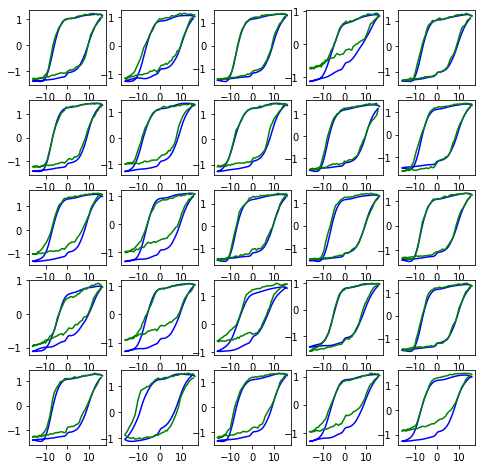

In [104]:
f_y5 = X
f_y6 = Y
f_fit = result

fig, axs = plt.subplots(5, 5, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,5):
    for j in range(0,5):
        k = np.random.randint(0, f_y5.shape[0])
        ax = axs[i,j]
        #ax.plot(f_y5[k],'r-')
        ax.plot(normalized['voltage'],f_fit[k],'b-')
        ax.plot(normalized['voltage'],f_y6[k],'g-')

# Folders

In [18]:
# builds folders where the data will be saved
folder_structure = util.file.make_folder(
    './structure')
folder_BE = util.file.make_folder(
    './Band_Excitation')
folder_BE_Movie_files = util.file.make_folder(
    folder_BE + '/BE_Movie_Files')
folder_BE_all_images = util.file.make_folder(
    folder_BE + '/BE_all_images')
folder_BE_spectra = util.file.make_folder(
    folder_BE + '/BE_spectra')
folder_BE_cleaned_spectra = util.file.make_folder(
    folder_BE + '/cleaned_spectra')
folder_pca = util.file.make_folder(
    './pca')
folder_nmf = util.file.make_folder(
    './nmf')
folder_clustering = util.file.make_folder('./clustering')
folder_pca_clustering = util.file.make_folder(
    './pca_clustering')
folder_piezoresponse_autoencoder = util.file.make_folder(
    './piezoresponse_autoencoder')
folder_resonance_autoencoder = util.file.make_folder(
    './resonance_autoencoder')
folder_piezoresponse_autoencoder_movie = util.file.make_folder(
    folder_piezoresponse_autoencoder + '/movie')
folder_piezoresponse_autoencoder_training_movie = util.file.make_folder(
    folder_piezoresponse_autoencoder + '/training_movie')
folder_resonance_autoencoder_movie = util.file.make_folder(
    folder_resonance_autoencoder + '/movie')
folder_resonance_autoencoder_training_movie = util.file.make_folder(
    folder_resonance_autoencoder + '/training_movie')
folder_phase_field = util.file.make_folder(
    './Phase_Field')

In [19]:
# sets the plotting format
plot_format = {
    # adds scalebar to image
    'add_scalebar': True,
    # sets the dimensions for the scalebar [(size of image),(size of scalebar)]
    'scalebar': [2000, 500],
    # selects if the image will be rotated
    'rotation': True,
    # selects the rotation angle of the image
    'angle': 60.46,
    # sets the fraction of the image to crop
    'frac_rm': 0.17765042979942694,
    # sets the resolution of the image
    'dpi': 300,
    # sets the default colormap
    'color_map': 'viridis',
    # sets if color bars should be added
    'color_bars': True}

In [30]:
Try.save('piezo_auto_test')

In [56]:
Try.weights

AttributeError: 'list' object has no attribute 'shape'

In [26]:
### Loads Pre-Trained Model
#
## loading the pre-trained weights
#piezoresponse_model.load_weights(model_folder + '/weights.15179-0.00.hdf5')
#
## Updates the decoder based on decoding optimization.
## this was done to improve the quality of the reconstruction.
#piezoresponse_model, piezoresponse_decoder = rnn.update_decoder(piezoresponse_model,
#                                                                './Trained Models/Piezoresponse/weights.00033723-0.0022.hdf5')

piezoresponse_model=load_model('resnet_jagar_data_16')

# Displays the model summary
piezoresponse_model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 96, 1)        0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 96, 256)      133120      input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 96, 256)      0           bidirectional_1[0][0]            
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 96, 256)      394240      activation_1[0][0]               
___________________________________________________________________________________________

In [27]:
# Computes the low dimensional layer
piezoresponse_embeddings = rnn.get_activations(piezoresponse_model,
                                               normalized['piezoresponse'],
                                               24)

In [28]:
activation = rnn.get_ith_layer_output(piezoresponse_model, np.atleast_3d(normalized['piezoresponse']), 24)

In [29]:
# Sets what object to export
printing = {  # exports eps vector graphics (note these files can be large)
    'EPS': True,
    # exports png files
    'PNG': True,
    # prints image series (note this can take some time)
    'all_figures': False,
    # generates movies (note this can take some time)
    'movies': False,
    # resolution of the images
    'dpi': 300}

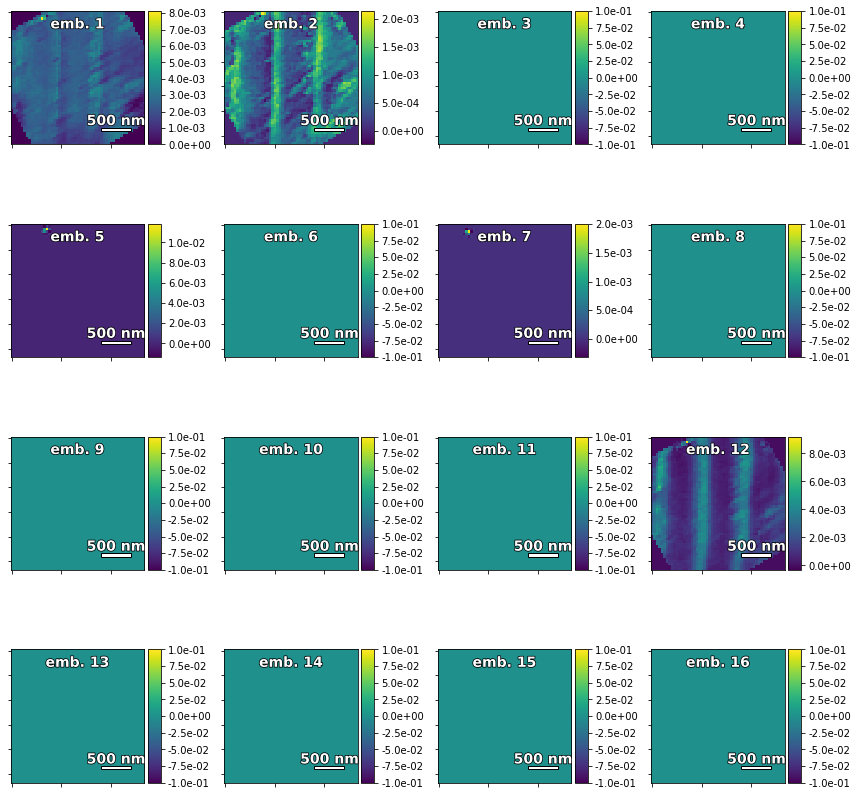

In [31]:
# plots the embedding maps
_ = viz.plot.embedding_maps(piezoresponse_embeddings,
                            printing,
                            plot_format,
                            folder_piezoresponse_autoencoder,
                            filename='./resnet_jagar_data_16')

In [24]:
activation.shape

(3600, 16)

In [49]:
??rnn.train_model

In [50]:
import h5py